In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# caricamento dataset
df= pd.read_csv("DATASETS/owid-covid-data.csv")

In [5]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [13]:
#visiualizzazione dimensioni e colonne

print(f"Righe: {df.shape[0]:,}")
print(f"Colonne: {df.shape[1]}")


Righe: 429,435
Colonne: 67


In [16]:
#lista ordinate delle colonne
for i, col in enumerate(sorted(df.columns), 1):
    print(f"{i}. {col}")

1. aged_65_older
2. aged_70_older
3. cardiovasc_death_rate
4. continent
5. date
6. diabetes_prevalence
7. excess_mortality
8. excess_mortality_cumulative
9. excess_mortality_cumulative_absolute
10. excess_mortality_cumulative_per_million
11. extreme_poverty
12. female_smokers
13. gdp_per_capita
14. handwashing_facilities
15. hosp_patients
16. hosp_patients_per_million
17. hospital_beds_per_thousand
18. human_development_index
19. icu_patients
20. icu_patients_per_million
21. iso_code
22. life_expectancy
23. location
24. male_smokers
25. median_age
26. new_cases
27. new_cases_per_million
28. new_cases_smoothed
29. new_cases_smoothed_per_million
30. new_deaths
31. new_deaths_per_million
32. new_deaths_smoothed
33. new_deaths_smoothed_per_million
34. new_people_vaccinated_smoothed
35. new_people_vaccinated_smoothed_per_hundred
36. new_tests
37. new_tests_per_thousand
38. new_tests_smoothed
39. new_tests_smoothed_per_thousand
40. new_vaccinations
41. new_vaccinations_smoothed
42. new_vacci

In [18]:
#punto 2

# Consideriamo solo i dati più aggiornati: ultimo giorno per ogni paese
df_latest = df.sort_values("date").drop_duplicates(subset=["location"], keep="last")

# Filtro solo i continenti validi (esclude voci come 'World', 'International', ecc.)
df_latest = df_latest[df_latest["continent"].notna()]

# a. Numero totale di casi per continente
casi_per_continente = df_latest.groupby("continent")["total_cases"].sum()

# b. Percentuale sul totale mondiale
totale_mondiale = casi_per_continente.sum()
percentuali = (casi_per_continente / totale_mondiale) * 100

# Risultato finale
risultato = pd.DataFrame({
    "casi_totali": casi_per_continente,
    "percentuale_sul_totale": percentuali
})

print(risultato)

               casi_totali  percentuale_sul_totale
continent                                         
Africa          13145380.0                1.906914
Asia           251147941.0               36.432374
Europe         219394045.0               31.826046
North America  124492666.0               18.059330
Oceania         12364304.0                1.793608
South America   68809418.0                9.981728


In [26]:
#es 3 
df["date"] = pd.to_datetime(df["date"])
# Filtro Italia nel 2022
italy_2022 = df[(df["location"] == "Italy") & (df["date"].dt.year == 2022)]

# Tengo solo i giorni in cui sono riportati nuovi casi
italy_2022 = italy_2022[italy_2022["new_cases"].notna()]

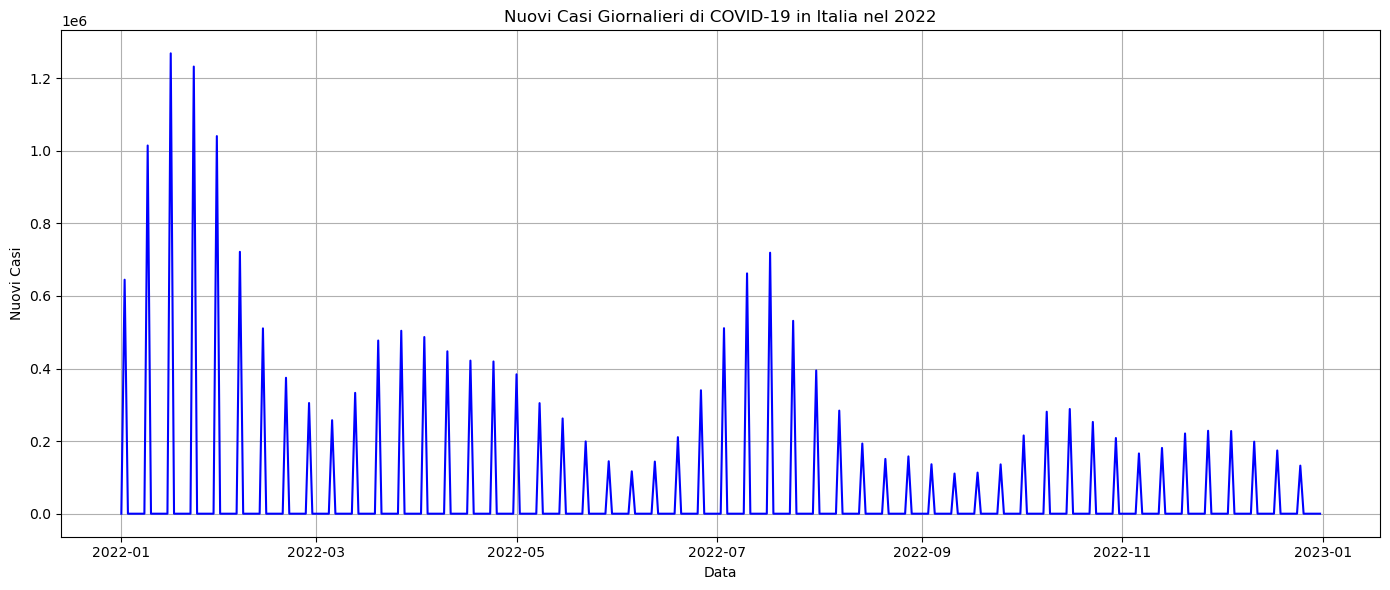

In [34]:
# Grafico dei nuovi casi giornalieri
plt.figure(figsize=(14, 6))
plt.plot(italy_2022['date'], italy_2022['new_cases'], color='blue')
plt.title('Nuovi Casi Giornalieri di COVID-19 in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.grid(True)
plt.tight_layout()
plt.show()

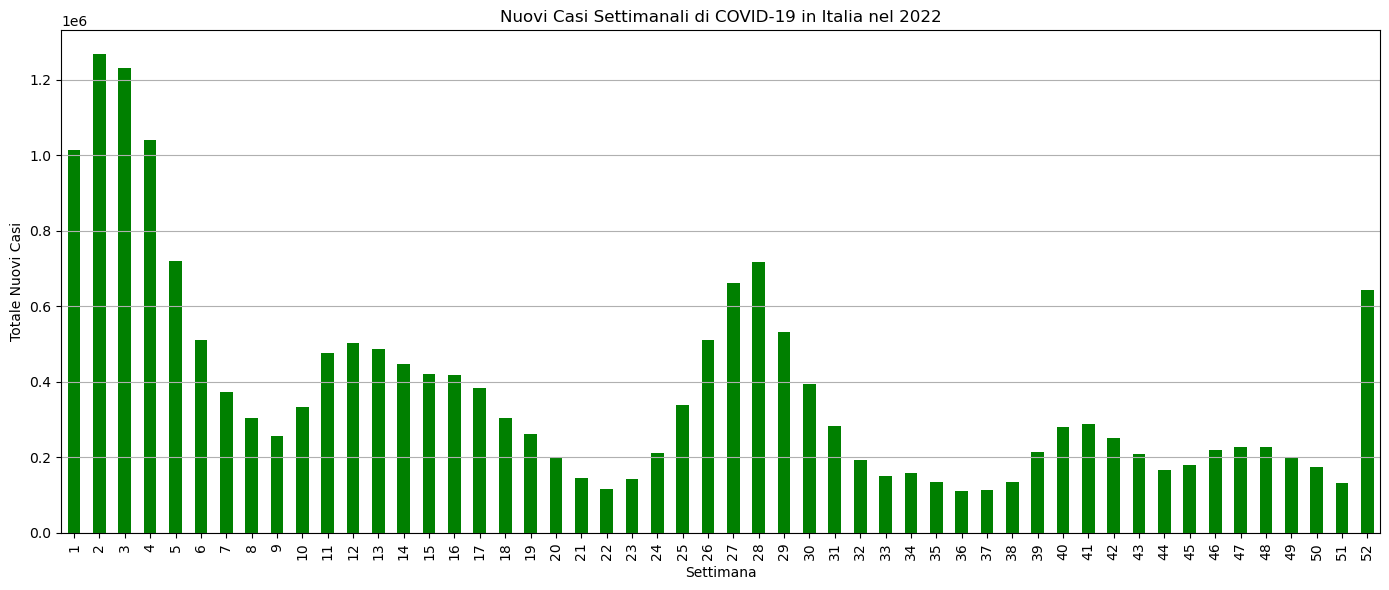

In [36]:
# Visualizzazione dei Nuovi Casi Settimanali in Italia nel 2022

# Aggiungo una colonna per la settimana
italy_2022['week'] = italy_2022['date'].dt.isocalendar().week

# Raggruppo i dati per settimana e somma i nuovi casi
weekly_cases = italy_2022.groupby('week')['new_cases'].sum()

# Grafico dei nuovi casi settimanali
plt.figure(figsize=(14, 6))
weekly_cases.plot(kind='bar', color='green')
plt.title('Nuovi Casi Settimanali di COVID-19 in Italia nel 2022')
plt.xlabel('Settimana')
plt.ylabel('Totale Nuovi Casi')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

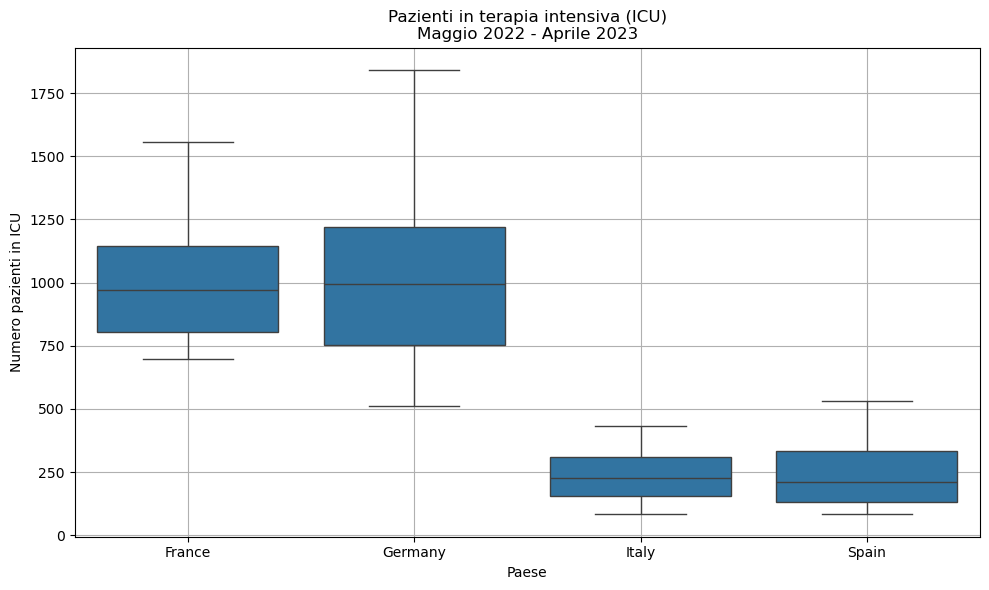

In [45]:
#ES 4


# Filtra per le 4 nazioni e date richieste
icu_data = df[
    (df["location"].isin(["Italy", "Germany", "France", "Spain"])) &
    (df["date"] >= "2022-05-01") &
    (df["date"] <= "2023-04-30") &
    (df["icu_patients"].notna())
]

# Crea il boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=icu_data, x="location", y="icu_patients")
plt.title("Pazienti in terapia intensiva (ICU)\nMaggio 2022 - Aprile 2023")
plt.xlabel("Paese")
plt.ylabel("Numero pazienti in ICU")
plt.grid(True)
plt.tight_layout()
plt.show()

commento: Dall’analisi del boxplot si nota che la Germania ha avuto valori medi e massimi più elevati di pazienti in ICU rispetto a Italia, Francia e Spagna. L’Italia mostra una variabilità minore.


Totale pazienti ospedalizzati nel 2021:
location
France     6008717.0
Germany          NaN
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64

Valori nulli presenti:
location
France       0
Germany    365
Italy        0
Spain        0
Name: hosp_patients, dtype: int64


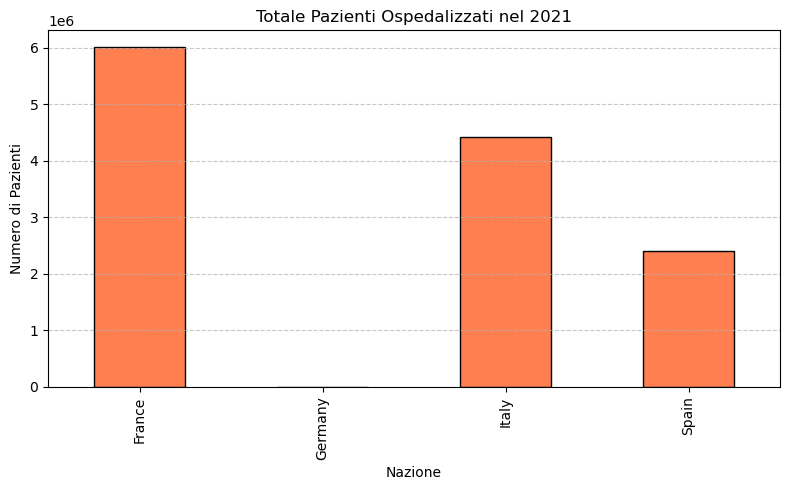

In [51]:
#Es 5 
# Filtra i dati del 2021 per i 4 paesi
hosp_data_2021 = df[
    (df["location"].isin(["Italy", "Germany", "France", "Spain"])) &
    (df["date"].dt.year == 2021)
]

# Calcola la somma dei pazienti ospedalizzati (colonna hosp_patients)
hospitalized_sum = hosp_data_2021.groupby("location")["hosp_patients"].sum(min_count=1)

# Conta i valori nulli
null_counts = hosp_data_2021.groupby("location")["hosp_patients"].apply(lambda x: x.isna().sum())

print("Totale pazienti ospedalizzati nel 2021:")
print(hospitalized_sum)

print("\nValori nulli presenti:")
print(null_counts)

# Visualizzazione grafica
plt.figure(figsize=(8, 5))
hospitalized_sum.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Totale Pazienti Ospedalizzati nel 2021")
plt.ylabel("Numero di Pazienti")
plt.xlabel("Nazione")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

commento: Alcuni paesi presentano valori nulli. Se i valori mancanti sono pochi e distribuiti uniformemente, si può valutare di riempirli con interpolazione o media mobile. Se invece mancano interi periodi, la sostituzione non è consigliabile.
